# 🔍 Overview  

Support Vector Machine (**SVM**) is one of the fundamental algorithms in **machine learning** used for **classification and regression problems**. Unlike Logistic Regression, which models probabilities, SVM is a **supervised learning algorithm** that makes predictions by finding the optimal **hyperplane** to separate different classes in the feature space. It classifies a new data point based on **support vectors** and margin maximization.  

### 💡 **Why use Support Vector Machine?**  
- **Effective in high-dimensional spaces** ✨ no explicit training phase, just store the data.  
- **Flexible** ✨ can be used for both **classification** and **regression** tasks.  
- **Works well with non-linear decision boundaries**.  
- **Handles multi-class classification** naturally.  
- **No assumptions about data distribution** ✨ purely data-driven.  

### ⚡ **Common Applications of Support Vector Machine:**  
- **Image Classification** 📸 (e.g., identifying objects, facial recognition).  
- **Text Classification** 📄 (e.g., spam detection, sentiment analysis).  
- **Bioinformatics** 🌿 (e.g., classifying protein structures, gene expression analysis).  
- **Handwritten Digit Recognition** ✍️ (e.g., OCR systems like digit recognition in postal mail).  
- **Stock Market Prediction** 📈 (e.g., predicting stock trends using historical data).  

# 📌  The Support Vector Machine Formula:

$$  
y = w \cdot x + b  
$$  

Where:  
✔ ( \( y \) ) **(Predicted Value)** → The predicted class (classification) or continuous value (regression) based on the decision boundary.  
✔ ( \( w \) ) **(Weight Vector)** → Defines the direction of the decision boundary.  
✔ ( \( x \) ) **(Feature Vector)** → The input data points in the feature space.  
✔ ( \( b \) ) **(Bias Term)** → Shifts the decision boundary.  
✔ ( \( \phi(x) \) ) **(Kernel Function)** → Maps data into a higher-dimensional space to handle non-linearity.  

⚠️ **Choosing the Right Kernel:**  
- **Linear Kernel** → Works well for linearly separable data.  
- **Polynomial & RBF Kernel** → Helps with complex, non-linearly separable datasets.  

🔑 **Key Insight:**  
- **SVM is a powerful and versatile algorithm** used for **classification and regression**.  
- **Maximizes the margin** between classes for better generalization.  
- **Supports non-linear decision boundaries** using the **kernel trick**.  
- **Robust to overfitting**, especially with proper **regularization**.  
- **Effective in high-dimensional spaces**, making it suitable for complex problems.  

💡 **SVM is widely used for text classification, bioinformatics, and image recognition! 🚀**  

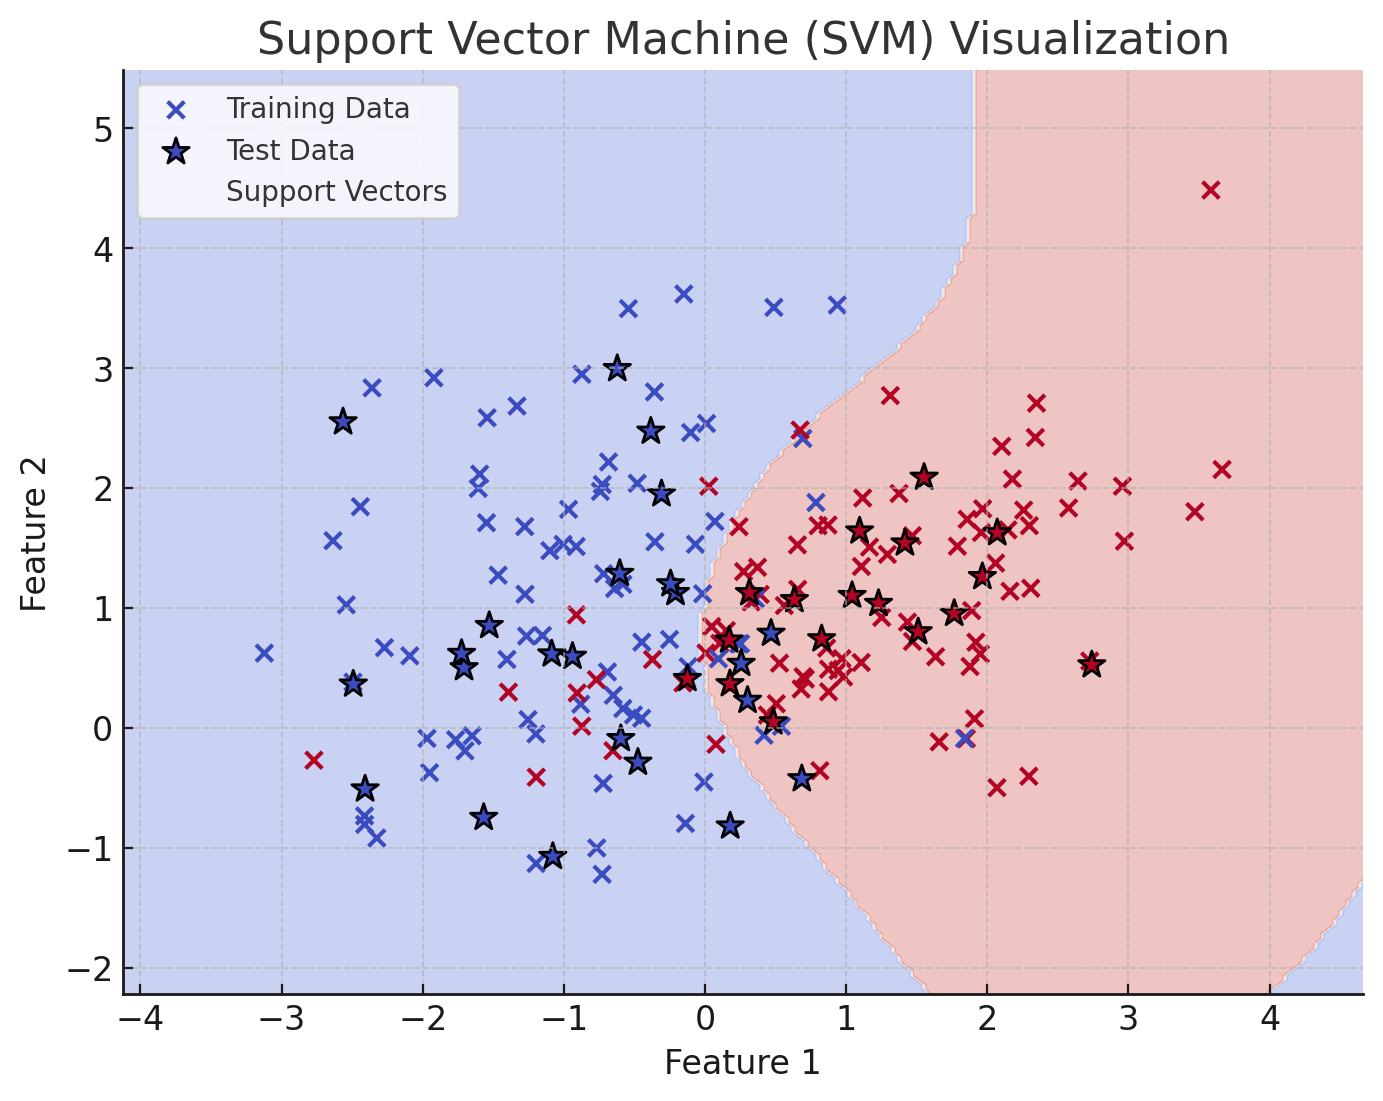# New Section

# 📊  Import necessary libraries




In [ ]:
# 📌 Import necessary libraries
import numpy as np  # 🔢 Numerical operations
import pandas as pd  # 📊 Data handling and processing
import matplotlib.pyplot as plt  # 📈 Visualization
import seaborn as sns  # 🎨 Enhanced visualization
from sklearn.model_selection import train_test_split, cross_val_score  # 🔄 Data splitting & cross-validation
from sklearn.neighbors import KNeighborsClassifier  # 🤖 K-Nearest Neighbors (KNN)
from sklearn.svm import SVC  # 🚀 Support Vector Machine (SVM)
from sklearn.ensemble import RandomForestClassifier  # 🌳 Random Forest Classifier
from sklearn.preprocessing import StandardScaler # from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix  # 📊 Evaluation metrics

# 📌 Load dataset

In [ ]:
# 📌 Load dataset
df = pd.read_csv("Social_Network_Ads.csv")  # 📂 Load dataset

FileNotFoundError: [Errno 2] No such file or directory: 'Social_Network_Ads.csv'

# 📌 Split features (X) and target variable (y)

In [ ]:
# 📌 Split features (X) and target variable (y)
X = df.iloc[:, :-1].values  # 🔢 Select all columns except the last as features
y = df.iloc[:, -1].values   # 🎯 The last column is the target variable

# 📌 Split the data into training and test sets (80% train / 20% test)

In [ ]:
# 📌 Split the data into training and test sets (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 🎲 Splitting dataset

#🔧🔧🔧 Standardize features (Normalization is crucial for SVM)

In [ ]:
# Standardize features (Normalization is crucial for SVM)
scaler = StandardScaler()  # 🔄 Scale features to have mean=0 and variance=1
X_train = scaler.fit_transform(X_train)  # 🏋️‍♂️ Fit on training data and transform
X_test = scaler.transform(X_test)  # 🔄 Transform test data using the same scaler

# 📌 Define models for comparison (KNN, SVM, Random Forest)


In [ ]:
# 📌 Define models for comparison (KNN, SVM, Random Forest)
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),  # 🤖 K-Nearest Neighbors
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),  # 🚀 Support Vector Machine
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)  # 🌳 Random Forest
}

# 📌 Dictionary to store model metrics
results = {}


# 🔥 Train models and calculate evaluation metrics

In [ ]:
# 🔥 Train models and calculate evaluation metrics
for name, model in models.items():
    model.fit(X_train, y_train)  # 🎓 Train the model
    y_pred = model.predict(X_test)  # 🔮 Make predictions on the test set

    # 📌 Compute classification metrics
    accuracy = accuracy_score(y_test, y_pred)  # ✅ Accuracy
    precision = precision_score(y_test, y_pred)  # 🎯 Precision
    recall = recall_score(y_test, y_pred)  # 🔄 Recall
    f1 = f1_score(y_test, y_pred)  # 📊 F1-score
    roc_auc = roc_auc_score(y_test, y_pred)  # 🚀 ROC-AUC Score

    # 📌 Store results in dictionary
    results[name] = [accuracy, precision, recall, f1, roc_auc]

    # 📌 Compute Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # 🎨 Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

# 📌 Convert results to DataFrame for better visualization

In [ ]:
# 📌 Convert results to DataFrame for better visualization
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"])

In [ ]:
# 📌 CROSS-VALIDATION (CV)
cv_results = {}  # 📊 Dictionary to store cross-validation scores

# 🔥 Perform 5-Fold Cross-Validation for each model

In [ ]:
# 🔥 Perform 5-Fold Cross-Validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')  # Compute accuracy for each fold
    avg_score = np.mean(scores)  # 📏 Compute mean accuracy

    # Store cross-validation results
    cv_results[name] = avg_score

    # Print cross-validation results
    print(f"📊 Cross-Validation Accuracy for {name}: {avg_score:.4f}")

# 📌 Convert cross-validation results to DataFrame

In [ ]:
# 📌 Convert cross-validation results to DataFrame
cv_df = pd.DataFrame(cv_results.items(), columns=["Model", "CV Accuracy"])

# 📌 Print Cross-Validation Table

In [ ]:
# 📌 Print Cross-Validation Table
print("\n📊 Cross-Validation Results:\n")
print(cv_df.to_string(index=False))

# 🔥 Display evaluation table

In [ ]:
# 🔥 Display evaluation table
print("\n📊 Classification Evaluation Metrics:\n")
print(metrics_df.to_string())  # Print DataFrame in a readable format

# 🎨 Visualization: Model Performance Comparison

In [ ]:
# 🎨 Enhanced Visualization: Model Performance Comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]
models_list = list(results.keys())

# Convert dictionary to array for plotting
metric_values_transposed = np.array(list(results.values())).T

# Define colors for bars
colors = ['#3498db', '#e74c3c', '#2ecc71']  # 🔵🔴🟢 Stylish colors

# Create a bar chart for model comparison
x = np.arange(len(metrics))  # 📊 Metric positions
width = 0.2  # 📏 Bar width

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each model
for i, model in enumerate(models_list):
    ax.bar(x + i * width, metric_values_transposed[:, i], width, label=model, color=colors[i])

# 📌 Formatting the plot
ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title(" Comparison of Classification Models by Performance Metrics")
ax.set_xticks(x + width / 2)
ax.set_xticklabels(metrics)

# 📌 Move legend to the bottom
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3, frameon=False)  # 🔽 Move legend down

# 🎨 Display the plot
plt.show()